# EE6483 Assignment 1:


## Question 1

given the samples, as the following:
| Index | X1 | X2 | X3 | X4 | Y |
|-------|---------|---------|---------|---------|---------|
| 1  | 1 | 1 | 0 | 0 | + |
| 2  | 0 | 0 | 0 | 0 | + |
| 3  | 1 | 1 | 1 | 1 | - |
| 4  | 1 | 1 | 0 | 0 | - |
| 5  | 1 | 0 | 1 | 0 | + |
| 6  | 0 | 0 | 1 | 1 | + |
| 7  | 1 | 1 | 1 | 0 | - |
| 8  | 0 | 1 | 1 | 1 | - |

### 1.(a) Apply ID3

In [1]:
import math
from math import log2

#first we need to calculate the information in D (of 8) with 2 distinct classes
infoD_depth1 = -((4/8)*log2(4/8) + (4/8)*log2(4/8))
print("infoD = ", infoD_depth1)

#now we need to find the info after choosing different attributes(X1 X2 X3 X4) 
infoX1_depth2 = 5/8 * (-((3/5)*log2(3/5) + (2/5)*log2(2/5))) + 3/8 * (-((1/3)*log2(1/3) + (2/3)*log2(2/3)))
gain_infoX1_depth2 = infoD_depth1 - infoX1_depth2
infoX2_depth2 = 5/8 * (-((4/5)*log2(4/5) + (1/5)*log2(1/5))) + 3/8 * (-((3/3)*log2(3/3) + 0))
gain_infoX2_depth2 = infoD_depth1 - infoX2_depth2
infoX3_depth2 = 5/8 * (-((3/5)*log2(3/5) + (2/5)*log2(2/5))) + 3/8 * (-((1/3)*log2(1/3) + (2/3)*log2(2/3)))
gain_infoX3_depth2 = infoD_depth1 - infoX3_depth2
infoX4_depth2 = 3/8 * (-((2/3)*log2(2/3) + (1/3)*log2(1/3))) + 5/8 * (-((2/5)*log2(2/5) + (3/5)*log2(3/5)))
gain_infoX4_depth2 = infoD_depth1 - infoX4_depth2

max_gain_depth2 = max(gain_infoX1_depth2, gain_infoX2_depth2, gain_infoX3_depth2, gain_infoX4_depth2)
print("infoX1 = ", infoX1_depth2)
print("...gain_infoX1 = ", gain_infoX1_depth2)
print("infoX2 = ", infoX2_depth2)
print("...gain_infoX2 = ", gain_infoX2_depth2)
print("infoX3 = ", infoX3_depth2)
print("...gain_infoX3 = ", gain_infoX3_depth2)
print("infoX4 = ", infoX4_depth2)
print("...gain_infoX4 = ", gain_infoX4_depth2)
print("max_gain_depth2 = ", max_gain_depth2)
print(f"we choose the attribute X{(gain_infoX1_depth2, gain_infoX2_depth2, gain_infoX3_depth2, gain_infoX4_depth2).index(max_gain_depth2)+1}")


infoD =  1.0
infoX1 =  0.9512050593046015
...gain_infoX1 =  0.04879494069539847
infoX2 =  0.4512050593046014
...gain_infoX2 =  0.5487949406953986
infoX3 =  0.9512050593046015
...gain_infoX3 =  0.04879494069539847
infoX4 =  0.9512050593046015
...gain_infoX4 =  0.04879494069539847
max_gain_depth2 =  0.5487949406953986
we choose the attribute X2


**Of course we can draw the 2 layers tree now**

{('nodeL11', 'nodeL21'): Text(-0.5000001966545824, 0.4999998033454176, '= 1'),
 ('nodeL11', 'nodeL22'): Text(0.5000001966545826, 0.4999998033454176, '= 0')}

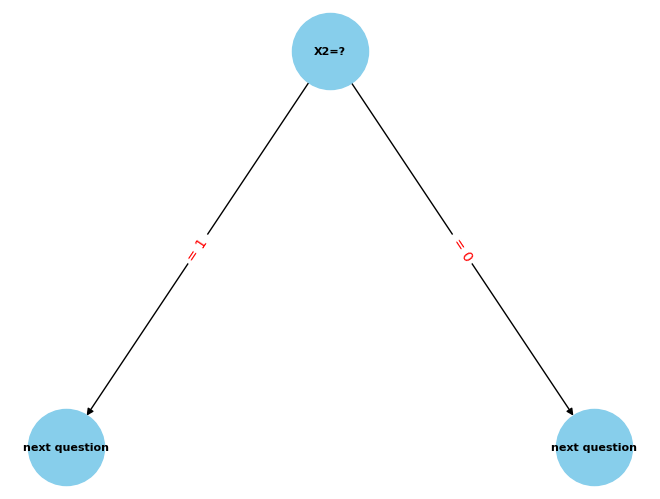

In [2]:
import networkx as nx

graph_depth2 = nx.DiGraph()
graph_depth2.add_node("nodeL11", text = "X2=?")
graph_depth2.add_node("nodeL21", text = "next question")
graph_depth2.add_node("nodeL22", text = "next question")

graph_depth2.add_edge("nodeL11", "nodeL21", label="= 1")
graph_depth2.add_edge("nodeL11", "nodeL22", label="= 0")

pos = {
    "nodeL11": (0, 1),
    "nodeL21": (-1, 0),
    "nodeL22": (1, 0)
}

node_labels = nx.get_node_attributes(graph_depth2, 'text')
nx.draw(graph_depth2, pos=pos, labels=node_labels, with_labels=True, node_size=3000, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="black")
edge_labels = nx.get_edge_attributes(graph_depth2, 'label')
nx.draw_networkx_edge_labels(graph_depth2, pos, edge_labels=edge_labels, font_color='red')


**we can now construct the third layer**

in the left node which X2 is 1, we have a table like this:
| Index | X1 | X3 | X4 | Y |
|-------|---------|---------|---------|---------|
| 1  | 1 | 0 | 0 | + |
| 3  | 1 | 1 | 1 | - |
| 4  | 1 | 0 | 0 | - |
| 7  | 1 | 1 | 0 | - |
| 8  | 0 | 1 | 1 | - |

in the right node which X2 is 0, we have a table like this:
| Index | X1 | X3 | X4 | Y |
|-------|---------|---------|---------|---------|
| 2  | 0 | 0 | 0 | + |
| 5  | 1 | 1 | 0 | + |
| 6  | 0 | 1 | 1 | + |

In [3]:
# for the left node
infoD1_depth2 = -((1/5)*log2(1/5) + (4/5)*log2(4/5))
print("infoD1_depth2 = ", infoD1_depth2)

# now we need to find the info after choosing different attributes(X1 X3 X4)
infoX1_depth3 = 1/5 * (-((1/1)*log2(1/1) + 0)) + 4/5 * (-((3/4)*log2(3/4) + (1/4)*log2(1/4)))
gain_infoX1_depth3 = infoD1_depth2 - infoX1_depth3
infoX3_depth3 = 3/5 * (-((3/3)*log2(3/3) + 0)) + 2/5 * (-((1/2)*log2(1/2) + (1/2)*log2(1/2)))
gain_infoX3_depth3 = infoD1_depth2 - infoX3_depth3
infoX4_depth3 = 3/5 * (-((2/3)*log2(2/3) + (1/3)*log2(1/3))) + 2/5 * (-((2/2)*log2(2/2) + 0))
gain_infoX4_depth3 = infoD1_depth2 - infoX4_depth3

max_gain_depth3 = max(gain_infoX1_depth3, gain_infoX3_depth3, gain_infoX4_depth3)
print("infoX1 = ", infoX1_depth3)
print("...gain_infoX1 = ", gain_infoX1_depth3)
print("infoX3 = ", infoX3_depth3)
print("...gain_infoX3 = ", gain_infoX3_depth3)
print("infoX4 = ", infoX4_depth3)
print("...gain_infoX4 = ", gain_infoX4_depth3)
print("max_gain_depth3 = ", max_gain_depth3)
print(f"we choose the attribute X{(gain_infoX1_depth3, 0, gain_infoX3_depth3, gain_infoX4_depth3).index(max_gain_depth3)+1}")

infoD2_depth2 = -((3/3)*log2(3/3) + 0)
print()
print("since infoD2_depth2 = 0, it is determined that the class is +")

infoD1_depth2 =  0.7219280948873623
infoX1 =  0.6490224995673063
...gain_infoX1 =  0.07290559532005603
infoX3 =  0.4
...gain_infoX3 =  0.3219280948873623
infoX4 =  0.5509775004326937
...gain_infoX4 =  0.17095059445466865
max_gain_depth3 =  0.3219280948873623
we choose the attribute X3

since infoD2_depth2 = 0, it is determined that the class is +


**now we can proceed the tree graph**

{('L11', 'L21'): Text(-0.5000012499513105, 0.49999875004868977, '= 1'),
 ('L11', 'L22'): Text(0.5000012499513105, 0.49999875004868977, '= 0'),
 ('L21', 'L31'): Text(-1.500001249951311, -0.5000012499513105, '= 1'),
 ('L21', 'L32'): Text(-0.49999875004868977, -0.5000012499513105, '= 0')}

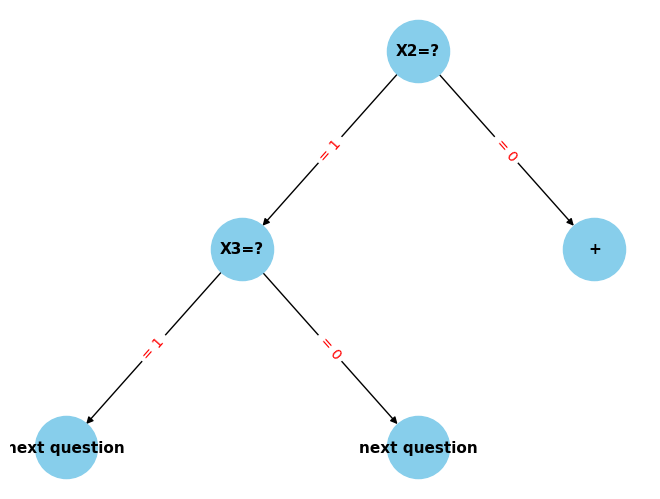

In [4]:
graph_depth3 = nx.DiGraph()

graph_depth3.add_node("L11", text = "X2=?")
graph_depth3.add_node("L21", text = "X3=?")
graph_depth3.add_node("L22", text = "+")
graph_depth3.add_node("L31", text = "next question")
graph_depth3.add_node("L32", text = "next question")

graph_depth3.add_edge("L11", "L21", label="= 1")
graph_depth3.add_edge("L11", "L22", label="= 0")
graph_depth3.add_edge("L21", "L31", label="= 1")
graph_depth3.add_edge("L21", "L32", label="= 0")

pos = {
    "L11": (0, 1),
    "L21": (-1, 0),
    "L22": (1, 0),
    "L31": (-2, -1),
    "L32": (0, -1)
}

node_labels = nx.get_node_attributes(graph_depth3, 'text')
nx.draw(graph_depth3, pos=pos, labels=node_labels, with_labels=True, node_size=2000, node_color="skyblue", font_size=11, font_color="black", font_weight="bold", edge_color="black")
edge_labels = nx.get_edge_attributes(graph_depth3, 'label')
nx.draw_networkx_edge_labels(graph_depth3, pos, edge_labels=edge_labels, font_color='red')


**we can now construct the fourth layer**

in the left node of layer 3, which X3 is 1, we have a table like this:
| Index | X1 | X4 | Y |
|-------|---------|---------|---------|
| 3  | 1 | 1 | - |
| 7  | 1 | 0 | - |
| 8  | 0 | 1 | - |

this node is no need to split anymore, since all the Y is the same, which is -


in the right node of layer 3, which X3 is 0, we have a table like this:
| Index | X1 | X4 | Y |
|-------|---------|---------|---------|
| 1  | 1 | 0 | + |
| 4  | 1 | 0 | - |

this node cannot be split anymore, because feature X1 and X4 are the same

**I will assign this node randomly, let's say +**

{('L11', 'L21'): Text(-0.5000012499513105, 0.49999875004868977, '= 1'),
 ('L11', 'L22'): Text(0.5000012499513105, 0.49999875004868977, '= 0'),
 ('L21', 'L31'): Text(-1.500001249951311, -0.5000012499513105, '= 1'),
 ('L21', 'L32'): Text(-0.49999875004868977, -0.5000012499513105, '= 0')}

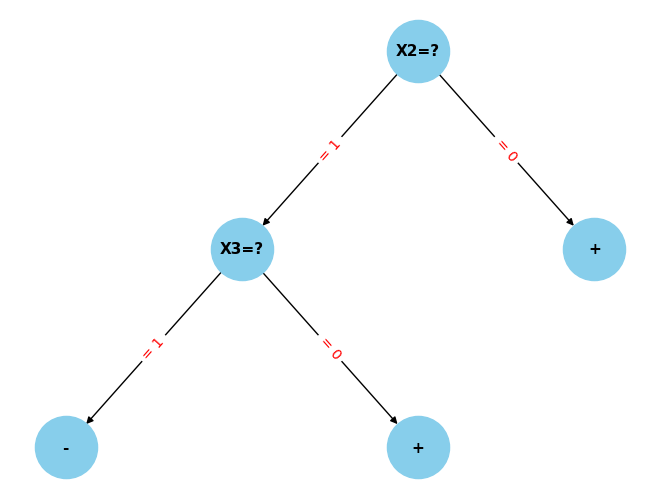

In [5]:
graph_depth3_complete = nx.DiGraph()

graph_depth3_complete.add_node("L11", text = "X2=?")
graph_depth3_complete.add_node("L21", text = "X3=?")
graph_depth3_complete.add_node("L22", text = "+")
graph_depth3_complete.add_node("L31", text = "-")
graph_depth3_complete.add_node("L32", text = "+")

graph_depth3_complete.add_edge("L11", "L21", label="= 1")
graph_depth3_complete.add_edge("L11", "L22", label="= 0")
graph_depth3_complete.add_edge("L21", "L31", label="= 1")
graph_depth3_complete.add_edge("L21", "L32", label="= 0")

pos = {
    "L11": (0, 1),
    "L21": (-1, 0),
    "L22": (1, 0),
    "L31": (-2, -1),
    "L32": (0, -1)
}

node_labels = nx.get_node_attributes(graph_depth3_complete, 'text')
nx.draw(graph_depth3_complete, pos=pos, labels=node_labels, with_labels=True, node_size=2000, node_color="skyblue", font_size=11, font_color="black", font_weight="bold", edge_color="black")
edge_labels = nx.get_edge_attributes(graph_depth3_complete, 'label')
nx.draw_networkx_edge_labels(graph_depth3_complete, pos, edge_labels=edge_labels, font_color='red')

### 1.(b) Predict the class of the following samples
| Index | X1 | X2 | X3 | X4 | Y |
|-------|---------|---------|---------|---------|---------|
| 9  | 1 | 0 | 1 | 1 | ? |
|10  | 0 | 1 | 1 | 0 | ? |

using the above tree, index9 first goes X2 = 0, so it is a +
index10 first goes X2 = 1, then goes X3 = 1, so it is a -

| Index | X1 | X2 | X3 | X4 | Y |
|-------|---------|---------|---------|---------|---------|
| 9  | 1 | 0 | 1 | 1 | + |
|10  | 0 | 1 | 1 | 0 | - |


### 1.(c) Can the tree be pruned?

Yes.
If we prune the tree to 2 layers, we can get a tree like this:
```
    X2=?
    /  \
   1    0
  /      \
(-)      (+)
```
recall that gain_infoX3 =  0.3219280948873623, we can tolerate the error if we do not split.

if we use the pruned tree to predict the samples and compare to ground truth, we will get correct results for index(2 to 8)

if we use unpruned tree to predict the samples, we will get correct results for index(123 5678)

so the pruned tree is good enough for this dataset

## Question 2

**KNN classifier**

let us denote the solid circle as class 1, and the hollow circle as class 0

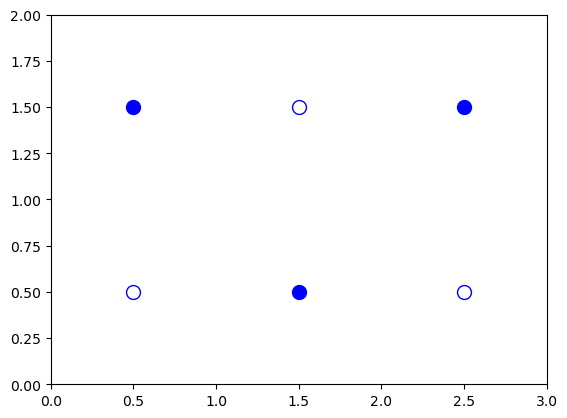

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim(0, 3)
ax.set_ylim(0, 2)

CLASS0 = [(0.5,0.5),(1.5,1.5),(2.5,0.5)]
CLASS1 = [(0.5,1.5),(1.5,0.5),(2.5,1.5)]

for point in CLASS0:
    ax.plot(*point, 'o', markerfacecolor='none', markeredgecolor='blue', markersize=10)
for point in CLASS1:
    ax.plot(*point, 'o', markerfacecolor='blue', markeredgecolor='blue', markersize=10)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

### 2.K=1 K=3 K=5

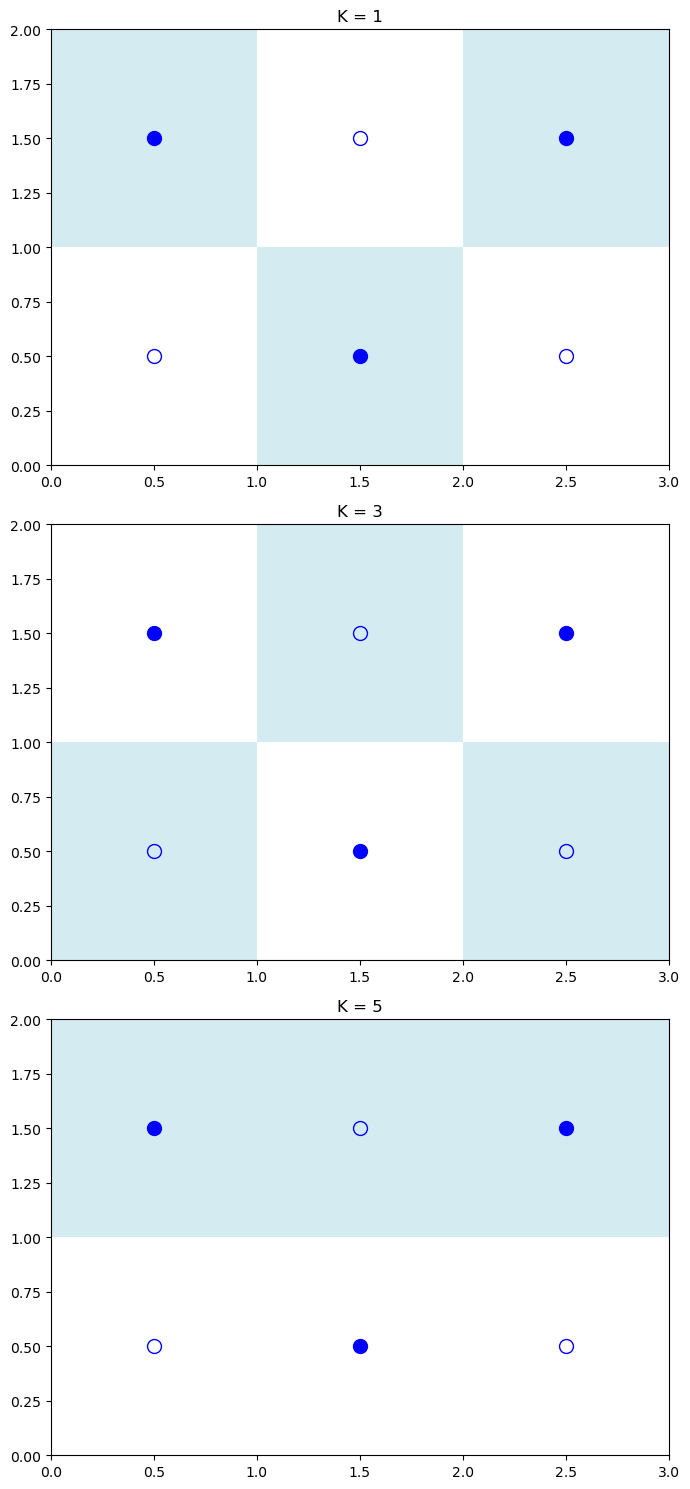

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(3,1, figsize=(7,15))
ax[0].set_xlim(0, 3)
ax[0].set_ylim(0, 2)
ax[1].set_xlim(0, 3)
ax[1].set_ylim(0, 2)
ax[2].set_xlim(0, 3)
ax[2].set_ylim(0, 2)

ax[0].set_title("K = 1")
ax[1].set_title("K = 3")
ax[2].set_title("K = 5")

rect1 = plt.Rectangle((0, 1), 1, 1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.5)
rect2 = plt.Rectangle((1, 0), 1, 1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.5)
rect3 = plt.Rectangle((2, 1), 1, 1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.5)
ax[0].add_patch(rect1)
ax[0].add_patch(rect2)
ax[0].add_patch(rect3)
rect1 = plt.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.5)
rect2 = plt.Rectangle((1, 1), 1, 1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.5)
rect3 = plt.Rectangle((2, 0), 1, 1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.5)
ax[1].add_patch(rect1)
ax[1].add_patch(rect2)
ax[1].add_patch(rect3)
rect1 = plt.Rectangle((0, 1), 3, 1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.5)
ax[2].add_patch(rect1)

CLASS0 = [(0.5,0.5),(1.5,1.5),(2.5,0.5)] # hollow blue
CLASS1 = [(0.5,1.5),(1.5,0.5),(2.5,1.5)] # solid blue

for point in CLASS0:
    for ind in range(len(ax)):
        ax[ind].plot(*point, 'o', markerfacecolor='none', markeredgecolor='blue', markersize=10)
for point in CLASS1:
    for ind in range(len(ax)):
        ax[ind].plot(*point, 'o', markerfacecolor='blue', markeredgecolor='blue', markersize=10)

plt.tight_layout()
plt.show()

# Generate sample points
x_samples = np.arange(0, 3.1, 0.05)
y_samples = np.arange(0, 2.1, 0.05)
sample_points = np.array([(x, y) for x in x_samples for y in y_samples])

# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Classify each sample point
for sample in sample_points:
    distances = [] # List of (distance, is_class1) tuples
    for point in CLASS0 + CLASS1:
        distances.append((euclidean_distance(sample, point), point in CLASS1))
    distances.sort(key=lambda x: x[0]) # Sort by distance

    nearest_neighbors1 = distances[:1] # Get the 1 nearest neighbors
    class1_count1 = sum(1 for _, is_class1 in nearest_neighbors1 if is_class1)
    
    if class1_count1 > 0: # in 1NN, 1 is majority
        ax[0].plot(sample[0], sample[1], 'x', color='red', markersize=5)

    nearest_neighbors3 = distances[:3] # Get the 3 nearest neighbors
    class1_count3 = sum(1 for _, is_class1 in nearest_neighbors3 if is_class1)
    
    if class1_count3 > 1: # in 3NN, 2 is majority
        ax[1].plot(sample[0], sample[1], 'x', color='red', markersize=5)
    
    nearest_neighbors5 = distances[:5] # Get the 5 nearest neighbors
    class1_count5 = sum(1 for _, is_class1 in nearest_neighbors5 if is_class1)
    
    if class1_count5 > 2: # in 5NN, 3 is majority
        ax[2].plot(sample[0], sample[1], 'x', color='red', markersize=5)

plt.show()